In [59]:
import numpy as np
import scipy.signal as signal
import scipy.fft as fft
import matplotlib.pyplot as plt

In [130]:
def plot_response(w, h, title):
    "Utility function to plot response functions"
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(w/2/np.pi, 20*np.log10(np.abs(h)))
    ax.set_ylim(-60, 5)
    ax.set_xlim(0, 0.5)
    ax.grid(True)
    ax.set_xlabel('Normalized Frequency')
    ax.set_ylabel('Gain (dB)')
    ax.set_title(title)

The most messy things are the convention wrt to the sampling frequency. Here we stick to scipy's remez default that `fs=1`. This implies that the "maximum frequency" of a filter... is 1/2.

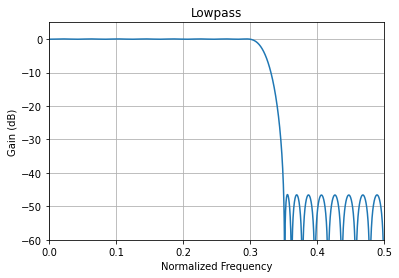

In [131]:
cutoff = 0.3    # Desired cutoff frequency
trans_width = 0.05  # Width of transition from pass band to stop band
numtaps = 50      # Size of the FIR filter.

taps = signal.remez(numtaps, [0, cutoff, cutoff + trans_width, 0.5], [1, 0], fs=1.0)
w, h = signal.freqz(taps, [1], worN=2000)

plot_response(w, h, "Lowpass")

The advantage of this convention is that we can simply use $sin(2 \pi n \theta)$ for a signal with frequency $\theta$. Below we plot the signal at the filter output; different values of `theta` yield different amplitudes.

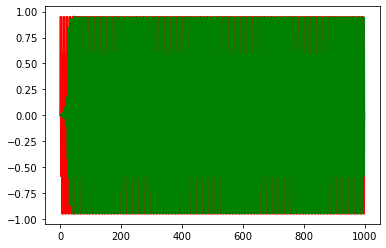

In [154]:
theta = 0.3
n = np.linspace(0,1000,1001)
x = np.sin(n*theta*2*np.pi)
y = signal.lfilter(taps,[1],x)
plt.plot(n,x,'r-', n,y,'-g')

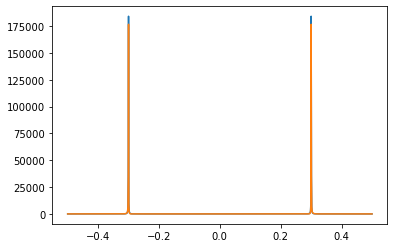

In [155]:
xfft = fft.fftshift(fft.fft(x))
xfft_abs =  xfft.real**2 + xfft.imag**2

yfft = fft.fftshift(fft.fft(y))
yfft_abs =  yfft.real**2 + yfft.imag**2

plt.plot(fft.fftshift(fft.fftfreq(len(x))), xfft_abs, fft.fftshift(fft.fftfreq(len(x))), yfft_abs)

Now let's consider other filters...

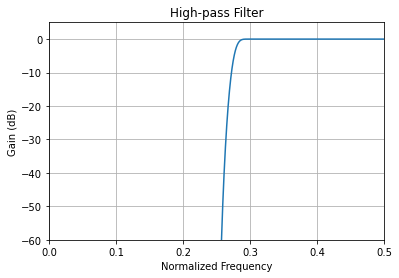

In [150]:
numtaps = 201      # Size of the FIR filter - this must be odd otherwise the filter is very bad! (for reasons I don't understand)

taps = signal.remez(numtaps, [0, cutoff - trans_width, cutoff, 0.5], [0, 1])
w, h = signal.freqz(taps, [1], worN=2000)

plot_response(w, h, "High-pass Filter")

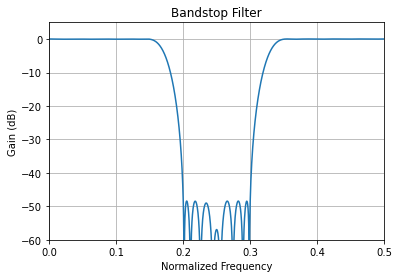

In [151]:
band = [0.2, 0.3]  # Desired stop band, Hz
trans_width = 0.05    # Width of transition from pass band to stop band, Hz
numtaps = 51        # Size of the FIR filter.

edges = [0, band[0] - trans_width, band[0], band[1], band[1] + trans_width, 0.5]
taps = signal.remez(numtaps, edges, [1, 0, 1])

w, h = signal.freqz(taps, [1], worN=2000)
plot_response(w, h, "Bandstop Filter")

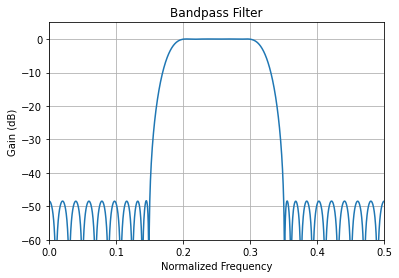

In [152]:
edges = [0, band[0] - trans_width, band[0], band[1], band[1] + trans_width, 0.5]
taps = signal.remez(numtaps, edges, [0, 1, 0])

w, h = signal.freqz(taps, [1], worN=2000)
plot_response(w, h, "Bandpass Filter")